In [ ]:
import pandas as pd

# Load the CSV files
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Preview the training data
print("Training Data Preview:")
print(train_data.head())

# Summary statistics
print("\nTraining Data Description:")
print(train_data.describe())

Training Data Preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

Training Data Description:
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.00

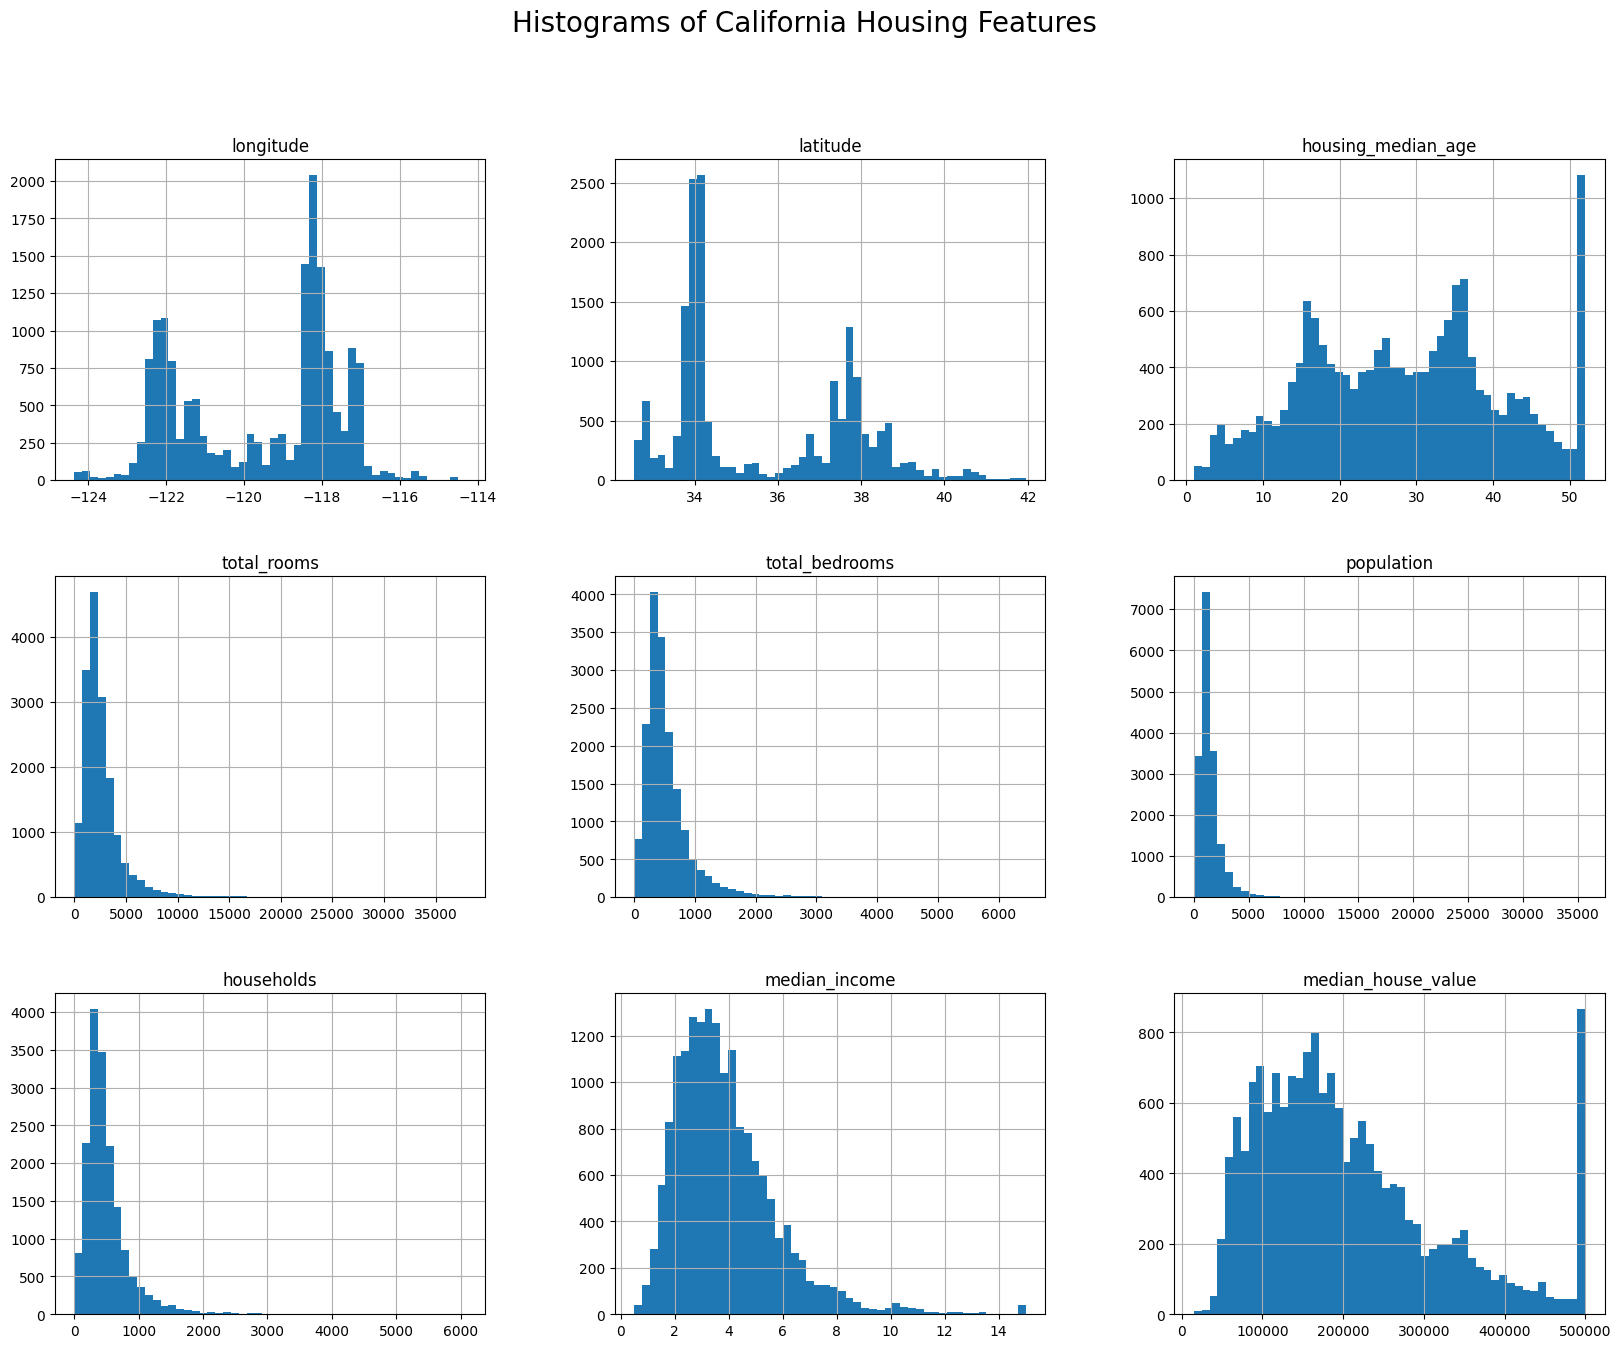

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all features
train_data.hist(bins=50, figsize=(20,15))
plt.suptitle("Histograms of California Housing Features", fontsize=20)
plt.show()

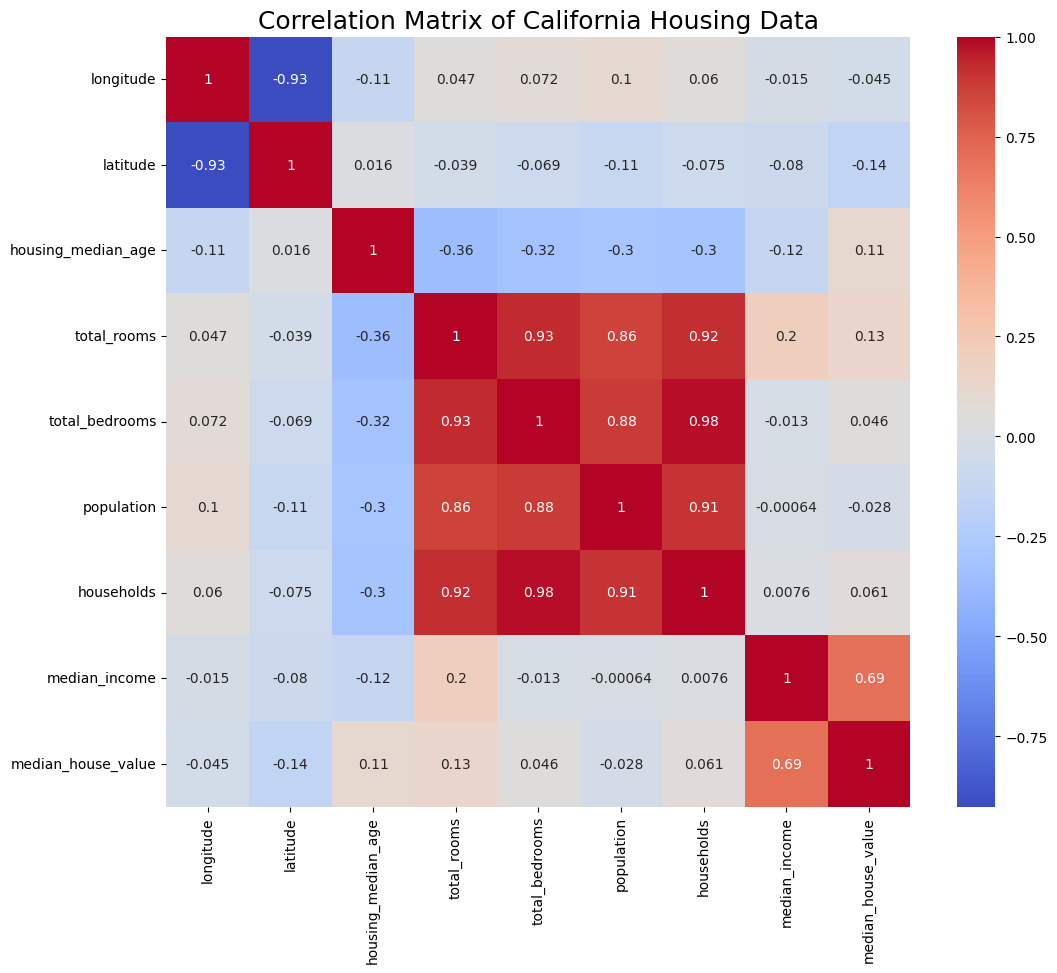

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = train_data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of California Housing Data", fontsize=18)
plt.show()

Column names in train_data: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


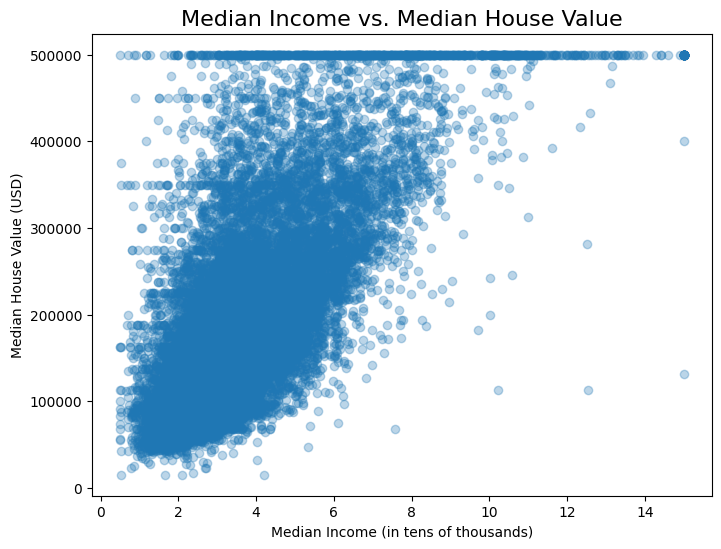

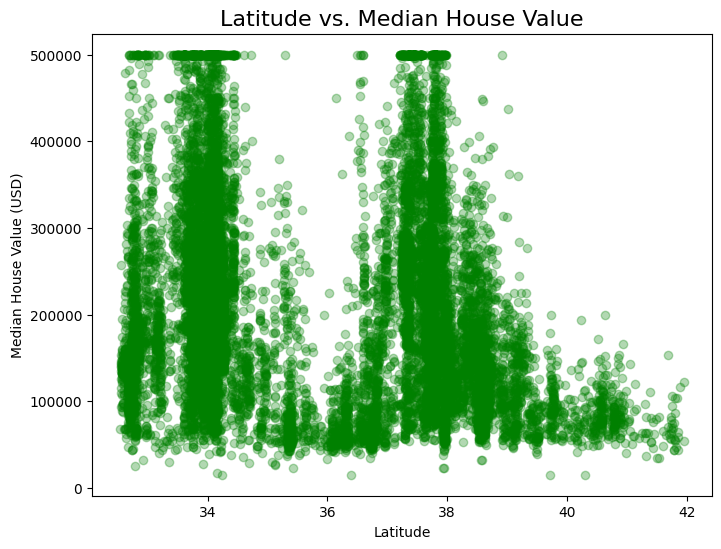

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Check the column names
print("Column names in train_data:", train_data.columns)

# Scatter plot for medianIncome vs. medianHouseValue
#Checking for whitespaces or wrong column names.
#Correct the column name.
#The correct column name is 'median_income'
plt.figure(figsize=(8,6))
plt.scatter(train_data['median_income'], train_data['median_house_value'], alpha=0.3)
plt.title("Median Income vs. Median House Value", fontsize=16)
plt.xlabel("Median Income (in tens of thousands)")
plt.ylabel("Median House Value (USD)")
plt.show()

# Scatter plot for latitude vs. medianHouseValue
plt.figure(figsize=(8,6))
plt.scatter(train_data['latitude'], train_data['median_house_value'], alpha=0.3, color='green')
plt.title("Latitude vs. Median House Value", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Median House Value (USD)")
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV files
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Define feature columns and target variable, correcting column names
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income'] #correct column names
target = 'median_house_value' #correct column name

# Separate features and target for training and testing data
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

Mean Squared Error (MSE): 2444757491.127797
R-squared Score: 0.8088808605012184


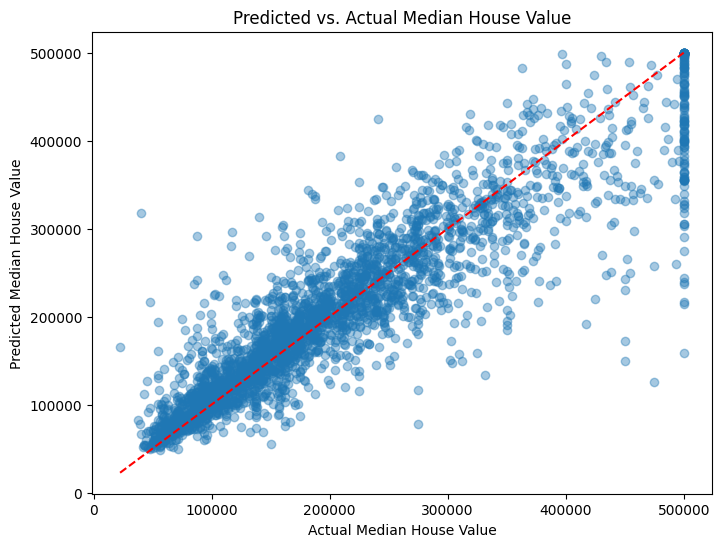

In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

# Plot predicted vs. actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs. Actual Median House Value")
plt.show()